In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
Train_Data = pd.read_csv('../src/Deep_Features/training_data.csv')
Train_Im = [np.array(Image.open(Train_Data['Train_Path'][0]).copy()).astype(np.double)]
Train_Mask = [np.array(Image.open(Train_Data['Train_Path_Labels'][0]).copy()).astype(np.double)]

# Prepare Training Data Set 

In [60]:
# Prepare the training set for extracting prototypica covariance descriptors for the horse image class

# Random indices 


Ind = np.random.choice(327,30)
Train_Im = []
Train_Mask = []
for im_num in Ind:
    if len(str(im_num)) == 3:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 2:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse0'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse0'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 1:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse00'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse00'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)

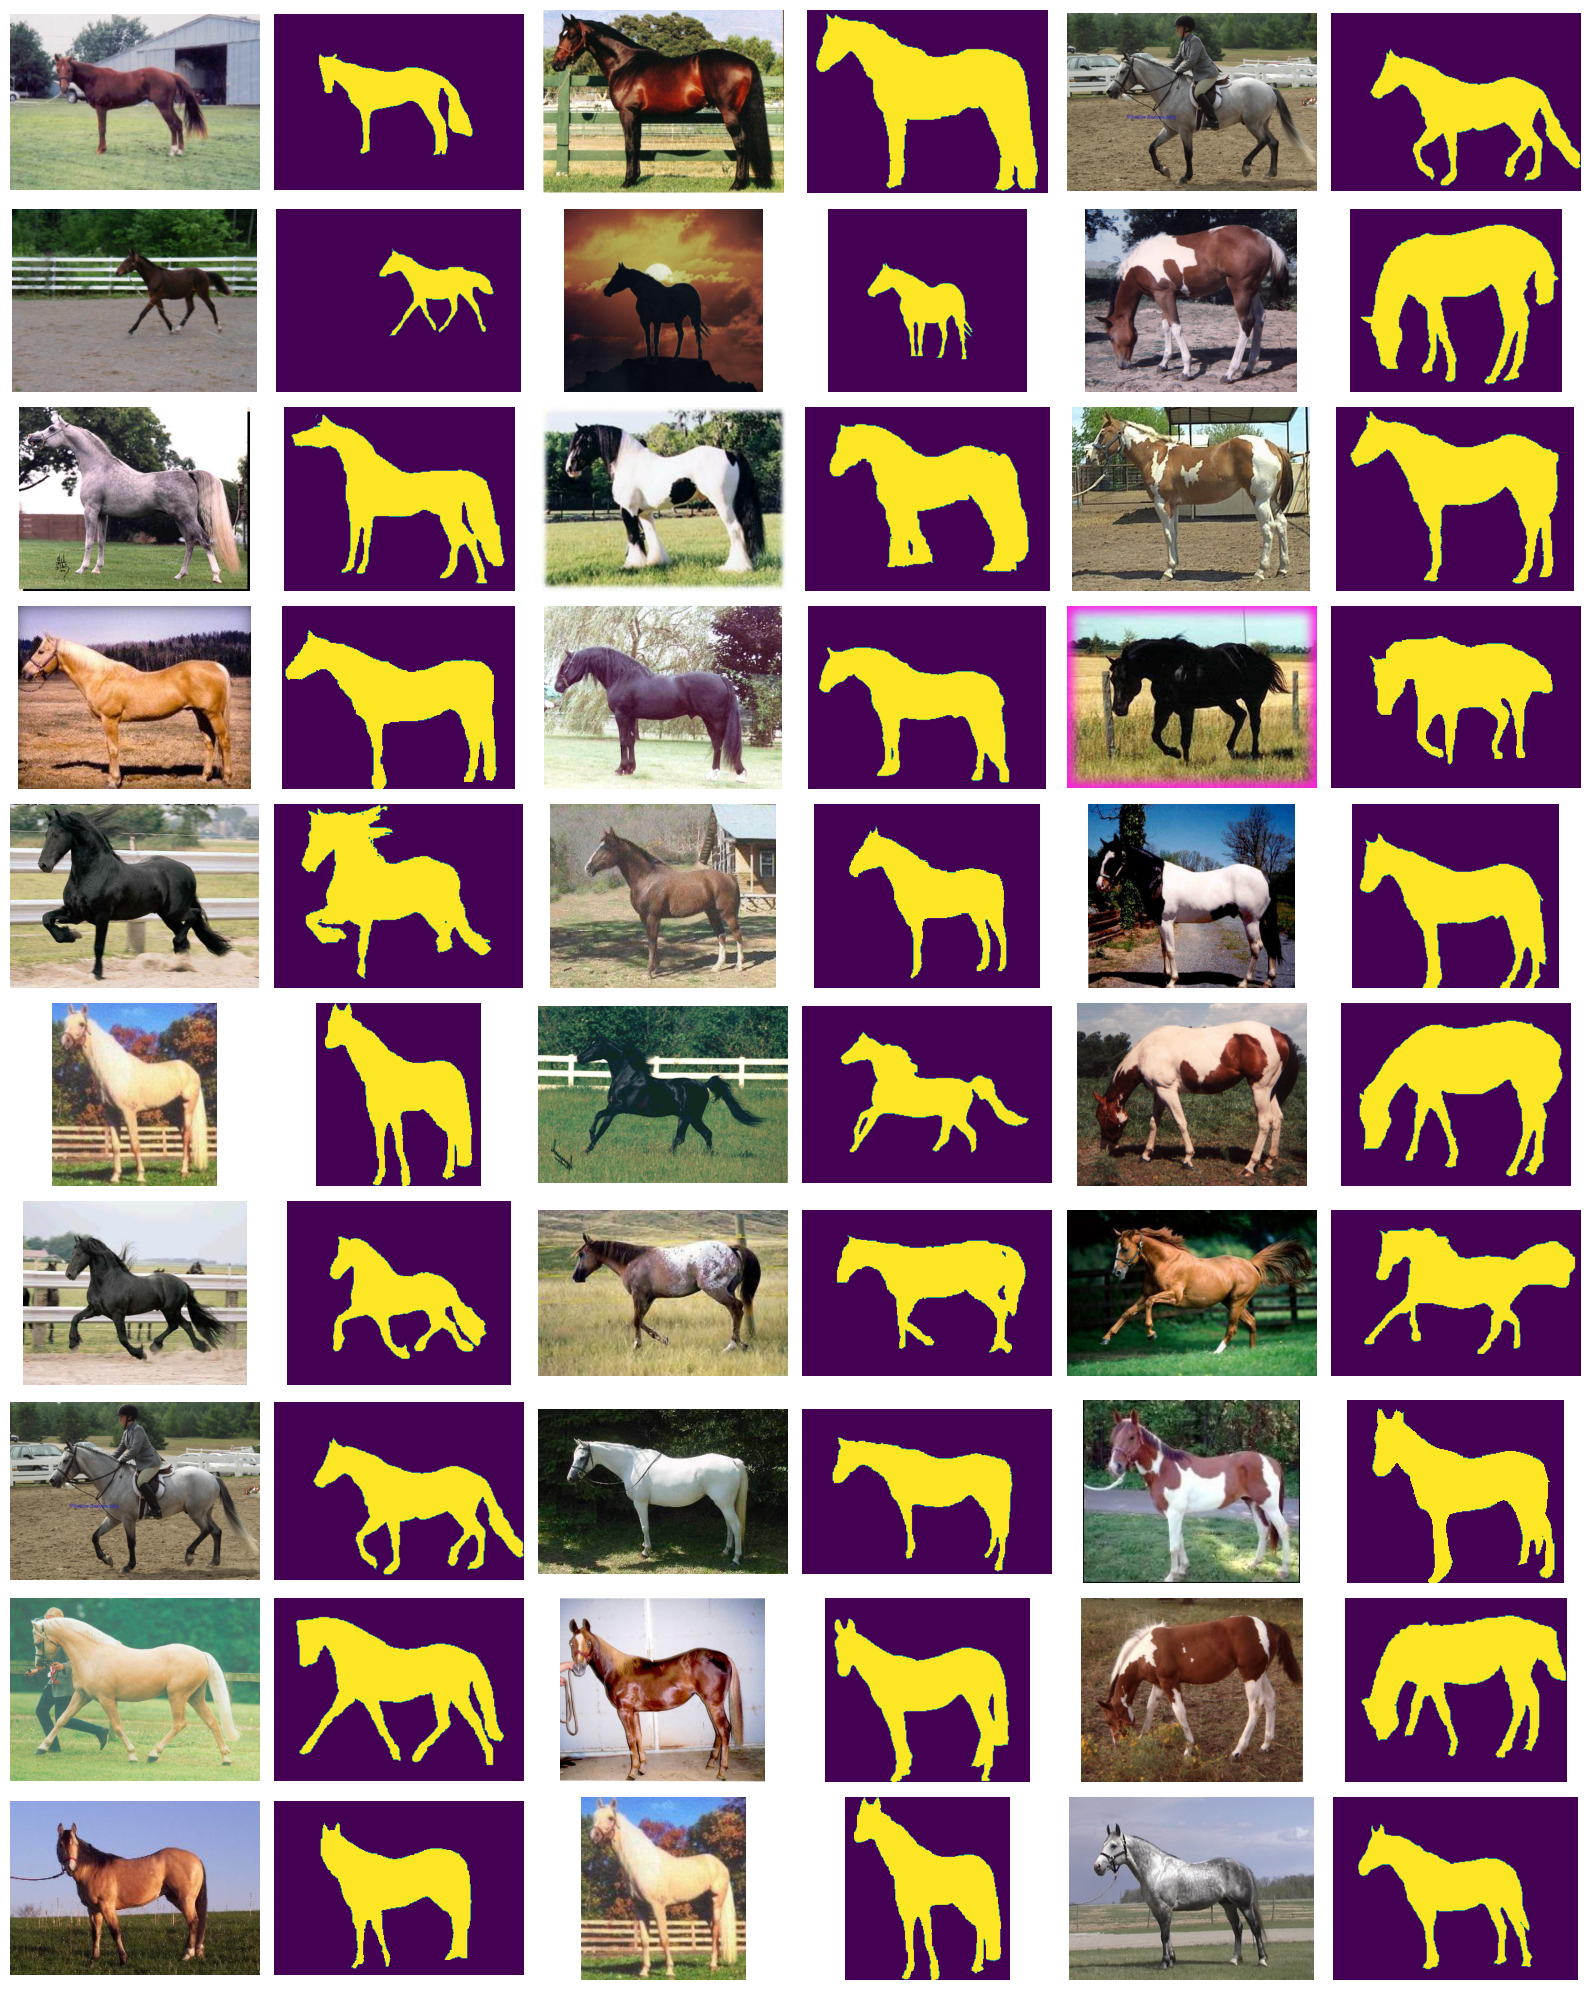

In [61]:
# Create a 10x4 grid of subplots
fig, axes = plt.subplots(10, 6, figsize=(16,20))  # Adjust size to fit

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop over images and axes
i = 0
for l in range(30):
    ax = axes[i]
    ax.imshow(Train_Im[l].astype(int), cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1
    ax = axes[i]
    ax.imshow(Train_Mask[l], cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1


plt.tight_layout()
plt.show()
    

# Compute Pixel-Wise Covariance Features

In [4]:
import sys
sys.path.append('/home/dmitrij/Documents/HDE_Code_Folder/Feature_Extraction_Lib/src/Covariance_Descriptor/')
from Feature_Extractor import Features

Train_Descripor_pd = []
for l in range(1):
    Cov_Features = Features(Train_Im[l],Scale_List=[9,11,13,15],filter_list = 'x,z,H,S,V,Ix,Iz,Izz,Ixx,Ixz,|gradI|,E,W',chanels_num=3,pad_x=7,pad_y=7,sigma_E=0.05)
    Train_Descripor_pd.append(Cov_Features.covariance_from_fvec())
features_dim = len(Cov_Features.filter_list)

' Add Regularization to avoid numerical instabilities '

for l in range(1):
        Train_Descripor_pd[l][:,:,:,:] += 0.01*np.eye(Cov_Features.f_vec.shape[2])



# Plot Feature Channels

Each RGB-valued data is mapped pixel-wise to the vector
\begin{gather}
f : \mathcal{D} \to \mathbb{R}^{10} \\
v \mapsto
(R(v),
G(v),
B(v),
I(v),
\nabla_x I(v),
\nabla_y I(v),
\nabla_z I(v),
\sqrt{2}\nabla_{xy} I(v),
\dots,
\nabla_{zz} I(v)
)^\top\ .
\end{gather}
from the intensities $I(v)$ as well as first- and
second-order responses of derivative filters capturing information from larger
scales. To improve the segmentation accuracy
we combine the derivative filter
responses from various scales by first
normalizing the derivatives of the input volume $I(v)$ at every scale $\sigma_s$
through convolution by a 1D window:
\begin{align}
	\nabla_x \tilde{I}_{\sigma_s}(v) = \sigma_s^{2}\frac{\partial}{\partial
	x}\tilde{G}(v,\sigma_s)
\end{align}
where $\tilde{G}(v,\sigma_s)$ is an approximation to a Gaussian window
$\big(G(v,\sigma_s)\ast I\big)(v)$ at scale $\sigma_s$ as in detail described
in
by taking local maxima over scales
\begin{align}
	\nabla_x \tilde{I}(v) = \max_{\sigma_s} \nabla_x \tilde{I}_{\sigma_s}(v),
\end{align}

For each neighborhood, on an image graph we the compute the regularized *region covariance descriptor*
\begin{align}
S_i := \sum_{j \in \mathcal{N}_i}\theta_{ij}
(f_j-\overline{f_i})(f_j-\overline{f_i})^T + \epsilon I, \quad
\overline{f_i} = \sum_{k \in \mathcal{N}_i}\theta_{ik}f_k,
\end{align}

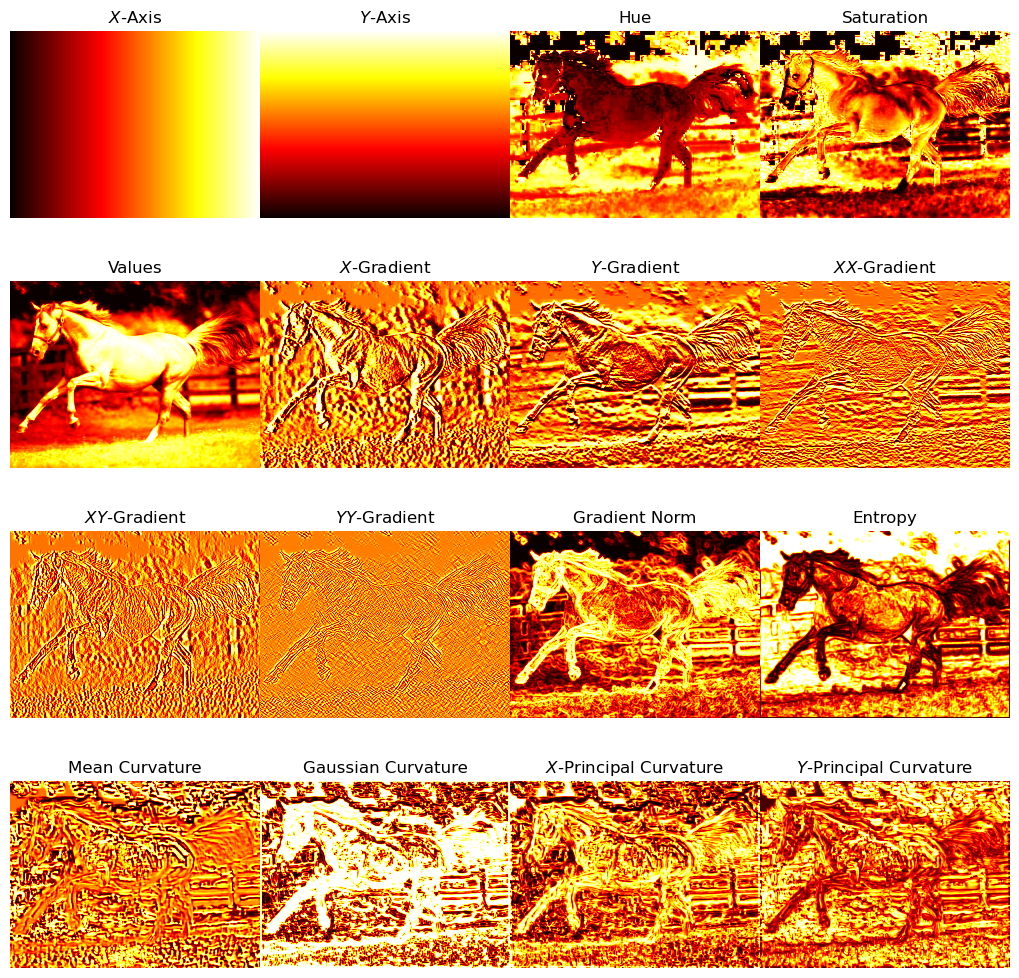

In [6]:
from skimage import exposure
import matplotlib.pyplot as plt

Title = ['$X$-Axis','$Y$-Axis','Hue','Saturation','Values','$X$-Gradient','$Y$-Gradient','$XX$-Gradient','$XY$-Gradient','$YY$-Gradient','Gradient Norm','Entropy','Mean Curvature','Gaussian Curvature','$X$-Principal Curvature','$Y$-Principal Curvature']
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

# Loop through each subplot
for k in range(16):
    ax = axes[k]
    data_eq = exposure.equalize_hist(Cov_Features.f_vec[:, :, k])  # Apply histogram equalization
    ax.imshow(data_eq, cmap='hot')
    ax.set_title(Title[k])
    ax.axis("off")  # Turn off axis
    ax.set_xticks([])  # Remove x-ticks
    ax.set_yticks([])  # Remove y-ticks

# Remove all extra white space
#fig.suptitle("Feature Maps Visualization", fontsize=16, weight="bold")
fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)
plt.savefig('Feature-Illustration.png',bbox_inches='tight')

# Display the figure
plt.show()

# Choose Feature via Random Forest Classifier 

In [173]:
Cov_Features.f_vec.shape

(600, 800, 16)

# Extract Covariance Descriptors 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

' Choose Test and Train Set '

Random_Samples = np.random.choice(np.prod(Train_Im[0].shape[0:2]),100000)
Random_Data = Cov_Features.f_vec.reshape(-1,16)[Random_Samples]
Random_Labels = Train_Mask[0].reshape(-1)[Random_Samples]

' Split into training and test data '

X_train, X_test, y_train, y_test = train_test_split(Random_Data, Random_Labels, test_size=0.3, random_state=42)

' Train Random Forest Classifier '

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral10

# Prepare Data
feature_names = [f"Feature {Title[i]}" for i in indices]  # Sorted feature names
feature_importances = importances[indices]  # Sorted importances

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data=dict(
    features=feature_names,
    importances=feature_importances
))

# Create the plot
p = figure(
    x_range=feature_names,
    title="Feature Importances",
    toolbar_location=None,
    tools="",
    plot_width=800,
    plot_height=400
)

# Add a bar glyph
p.vbar(
    x="features",
    top="importances",
    width=0.9,
    source=source,
    line_color='white',
    fill_color=factor_cmap('features', palette=Spectral10, factors=feature_names)
)

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "Features"
p.yaxis.axis_label = "Importance"

# Display the plot
output_notebook()  # Use this if running in a Jupyter notebook
show(p)




Loading BokehJS ...

In [108]:
from Geometric_Kmeans import Return_Descriptors
Num_Cluster = 400
Horse_Descriptors = (Return_Descriptors(Train_Descripor_pd[0:1],Train_Mask[0:1],1,K = Num_Cluster))


Extract Descriptors from Data_Sample ****0*****
Extract Descriptors from Data_Sample ****0*****
Finished in ---4789.936351776123---


In [110]:
' Reshape Descriptors as input for distance computation '

features_dim = Train_Descripor_pd[0].shape[2]
Im_num = 0
Prot_Test = Horse_Descriptors[:,:,:,:].reshape(2,Num_Cluster,features_dim*features_dim).reshape(2,Num_Cluster,features_dim,features_dim)

In [111]:
from Stein_Divergence_Mean import Log_Euclid_Distance,divergence_stein
from Descriptor_Cython.Geometric_Mean_Utils import distance_Riemmann
from Descriptor_Cython.cython_distance import distance_stein

' Compute the distance using Stein divergence ' 

#Test = np.squeeze(Log_Euclid_Distance(Train_Descripor_pd[10][:,:,None,:,:],Prot_Test))
#Test = np.squeeze(distance_Riemmann(Train_Descripor_pd[10][:,:,:,0:40].reshape(-1,9,9),Prot_Test[1,:,:,:]))
Im_num = 0
Test_1 = distance_stein(np.asarray(Train_Descripor_pd[Im_num][:,:,:,:]).reshape(-1,features_dim,features_dim),Prot_Test[0,:,:,:])
Test_2 = distance_stein(np.asarray(Train_Descripor_pd[Im_num][:,:,:,:]).reshape(-1,features_dim,features_dim),Prot_Test[1,:,:,:])

# Visualize Descriptor Accuracy 

In [ ]:
Test_1 = Test_1.reshape(Train_Im[Im_num].shape[0],Train_Im[Im_num].shape[1],1*Num_Cluster)
Test_2 = Test_2.reshape(Train_Im[Im_num].shape[0],Train_Im[Im_num].shape[1],1*Num_Cluster)
Seg_1 =[np.min(Test_1[:,:,0:k+1],axis = 2) for k in [l*100 for l in range(4)]]
Seg_2 =[np.min(Test_2[:,:,0:k+1],axis = 2) for k in [l*100 for l in range(4)]]

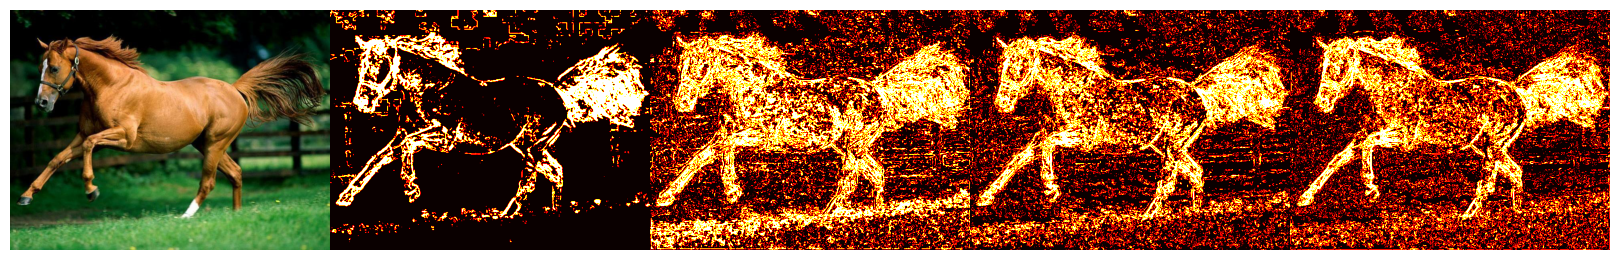

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the segmentation image
Im_Seg = np.zeros((Test_1.shape[0], Test_1.shape[1], 2))

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(16, 16))
axes = axes.flatten()
ax = axes[0]
ax.axis("off")
ax.imshow(Train_Im[Im_num].astype(int))
# Loop through pairs of Seg_1 and Seg_2
for k, (Im_1, Im_2) in enumerate(zip(Seg_1, Seg_2)):
    ax = axes[k+1]
    ax.axis("off")  # Turn off axis
    Im_Seg[:, :, 0] = Im_1
    Im_Seg[:, :, 1] = Im_2
    ax.imshow(np.argmin(Im_Seg, axis=2), cmap="hot")  # Plot segmented image

# Remove extra subplots if fewer images than grid slots
#for i in range(k + 1, len(axes)):
#    fig.delaxes(axes[i])

# Adjust layout to remove white spaces
fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)

# Save the figure
plt.savefig("Covariance-Descriptors-Accuracy.png", bbox_inches="tight")

# Show the plot
plt.show()

# Close the figure
plt.close(fig)
